<a href="https://colab.research.google.com/github/vishalveerareddy/VGG16/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os



In [0]:
batch_size = 32
num_classes = 10
epochs = 200
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'




In [21]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [22]:
# Convert class vectors to binary class matrices.
#y1_test=y_test.copy()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y1_test[0])



[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [25]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=30,
                        validation_data=(x_test, y_test),steps_per_epoch=25)



Using real-time data augmentation.
Epoch 1/30
25/25 [==============================] - 17s 683ms/step - loss: 2.3012 - acc: 0.1150 - val_loss: 2.2977 - val_acc: 0.1062
Epoch 2/30
25/25 [==============================] - 16s 627ms/step - loss: 2.2969 - acc: 0.1175 - val_loss: 2.2898 - val_acc: 0.1367
Epoch 3/30
25/25 [==============================] - 15s 611ms/step - loss: 2.2887 - acc: 0.1113 - val_loss: 2.2732 - val_acc: 0.1643
Epoch 4/30
25/25 [==============================] - 16s 630ms/step - loss: 2.2620 - acc: 0.1575 - val_loss: 2.2434 - val_acc: 0.1962
Epoch 5/30
25/25 [==============================] - 16s 624ms/step - loss: 2.2120 - acc: 0.1712 - val_loss: 2.1935 - val_acc: 0.2325
Epoch 6/30
25/25 [==============================] - 15s 610ms/step - loss: 2.1716 - acc: 0.2088 - val_loss: 2.1288 - val_acc: 0.2280
Epoch 7/30
25/25 [==============================] - 15s 615ms/step - loss: 2.1010 - acc: 0.2062 - val_loss: 2.0921 - val_acc: 0.2314
Epoch 8/30
25/25 [================

In [26]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 12s 1ms/step
Test loss: 1.7427364456176757
Test accuracy: 0.3843


In [0]:
import matplotlib.pyplot as plt

a=model.predict(x_test[1].reshape(-1,32,32,3))


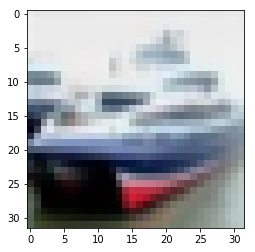

In [63]:
plt.imshow(x_test[1])

In [70]:
a=a.reshape(10,)
a

array([0.185373  , 0.3186662 , 0.02755018, 0.00761311, 0.00901073,
       0.00489143, 0.00476707, 0.01120929, 0.26342064, 0.16749842],
      dtype=float32)

In [65]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

'airplane\t\t\t\t\t\t\t\t\t\t\nautomobile\t\t\t\t\t\t\t\t\t\t\nbird\t\t\t\t\t\t\t\t\t\t\ncat\t\t\t\t\t\t\t\t\t\t\ndeer\t\t\t\t\t\t\t\t\t\t\ndog\t\t\t\t\t\t\t\t\t\t\nfrog\t\t\t\t\t\t\t\t\t\t\nhorse\t\t\t\t\t\t\t\t\t\t\nship\t\t\t\t\t\t\t\t\t\t\ntruck'

In [0]:
import numpy as np
def predict1(a,b):
  """a is the predict array while b is the test array"""
  max_val=np.amax(a)
  max_index=np.argmax(a)
  real_val=np.amax(b)
  real_index=np.argmax(real_val)
  item_list=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
  return (item_list[max_index],item_list[real_index])

In [75]:
predict1(a,y_test[1])

('automobile', 'airplane')

In [76]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 13s 1ms/step


[1.7427364456176757, 0.3843]